# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [21]:
df = pd.DataFrame(data = np.c_[diabetes['data'], diabetes['target']],
                  columns = diabetes['feature_names'] + ['target'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
# Use only one feature BMI
diabetes_X = np.array(df[['bmi']])

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [7]:
# The coefficients
print('Coefficients: ', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients:  [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


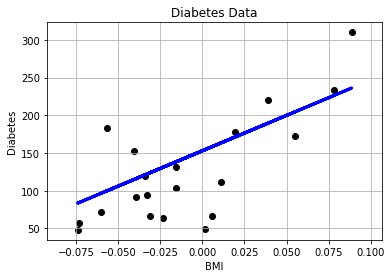

In [8]:
plt.figure()
plt.title("Diabetes Data")
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.grid(True)
plt.show()

Mean squared error: 5164.85


C:\Users\blue_\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


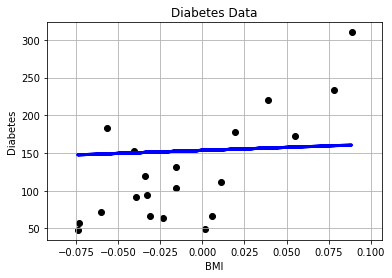

In [10]:
SGR_regr = linear_model.SGDRegressor(loss='squared_loss', penalty=None, n_iter=100)

SGR_regr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = SGR_regr.predict(diabetes_X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

plt.figure()
plt.title("Diabetes Data")
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.grid(True)
plt.show()

# Polynomial Regression

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

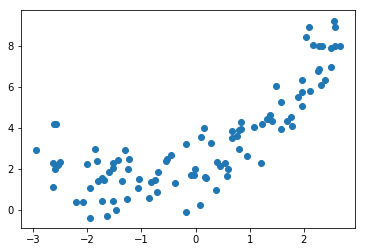

In [13]:
plt.scatter(X, y)
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.52889855]
[-0.52889855  0.27973368]


In [17]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_